# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Setting a seed for reproducibility

In [ ]:
np.random.seed(123)

# Loading the dataset

In [ ]:
df = pd.read_csv('diabetes.csv')


# Taking a random sample of 25 observations 

In [ ]:
sample = df.sample(n=25)


# Finding mean Glucose and highest Glucose values


In [ ]:
sample_mean = sample['Glucose'].mean()
sample_mean

130.36

In [ ]:
sample_max = sample['Glucose'].max()
sample_max

197

In [ ]:
population_mean = df['Glucose'].mean()
population_mean

120.89453125

In [ ]:
population_max = df['Glucose'].max()
population_max

199

# Comparing the statistics using a bar chart

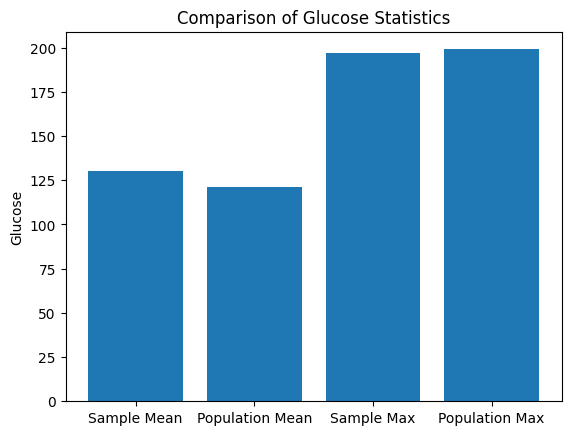

In [ ]:
fig, ax = plt.subplots()
ax.bar(['Sample Mean', 'Population Mean', 'Sample Max','Population Max'], [sample_mean, population_mean, sample_max, population_max])
ax.set_ylabel('Glucose')
ax.set_title('Comparison of Glucose Statistics')
plt.show()

# Finding the 98th percentile of BMI for the sample and the population


In [ ]:
sample_98th_percentile = np.percentile(sample['BMI'], 98)

sample_98th_percentile


45.263999999999996

In [ ]:
population_98th_percentile = np.percentile(df['BMI'], 98)

population_98th_percentile

47.52599999999996

# Comparing the percentiles using a boxplot

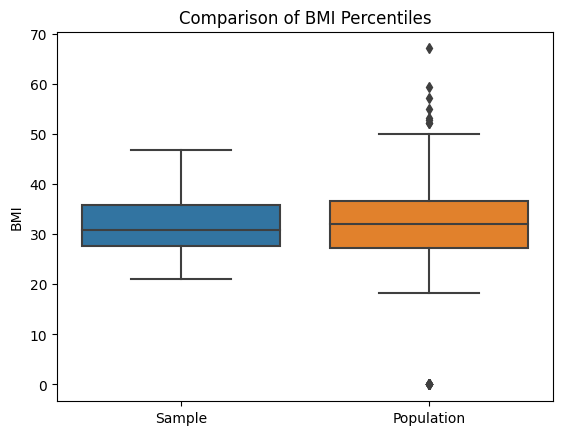

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(data=[sample['BMI'], df['BMI']])
ax.set_xticklabels(['Sample', 'Population'])
ax.set_ylabel('BMI')
ax.set_title('Comparison of BMI Percentiles')
plt.show()

# Using bootstrap to create 500 samples of 150 observations each and finding the average mean, standard deviation, and percentile for BloodPressure


In [ ]:
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for i in range(500):
    bootstrap_sample = df['BloodPressure'].sample(n=150, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())
    bootstrap_stds.append(bootstrap_sample.std())
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 90))
    

# Finding the mean, standard deviation, and percentile for BloodPressure in the population


In [44]:
population_bp_mean = df['BloodPressure'].mean()
population_bp_mean

69.10546875

In [ ]:
population_bp_std = df['BloodPressure'].std()
population_bp_std

19.355807170644777

In [ ]:
population_bp_percentile = np.percentile(df['BloodPressure'], 90)
population_bp_percentile

88.0

# Comparing the statistics using a boxplot


# Boxplot for mean comparison

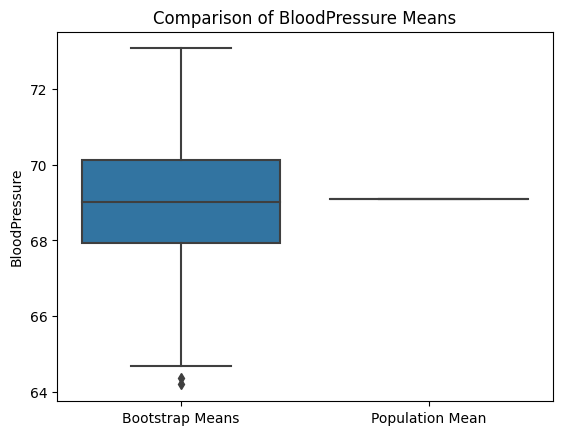

In [43]:
fig, ax = plt.subplots()
sns.boxplot(data=[bootstrap_means, [population_bp_mean]])
ax.set_xticklabels(['Bootstrap Means', 'Population Mean'])
ax.set_ylabel('BloodPressure')
ax.set_title('Comparison of BloodPressure Means')
plt.show()

# Boxplot for standard deviation comparison


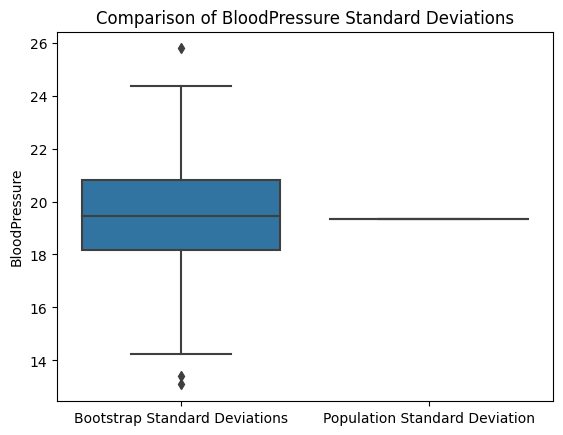

In [45]:
fig, ax = plt.subplots()
sns.boxplot(data=[bootstrap_stds, [population_bp_std]])
ax.set_xticklabels(['Bootstrap Standard Deviations', 'Population Standard Deviation'])
ax.set_ylabel('BloodPressure')
ax.set_title('Comparison of BloodPressure Standard Deviations')
plt.show()

# Boxplot for percentile comparison


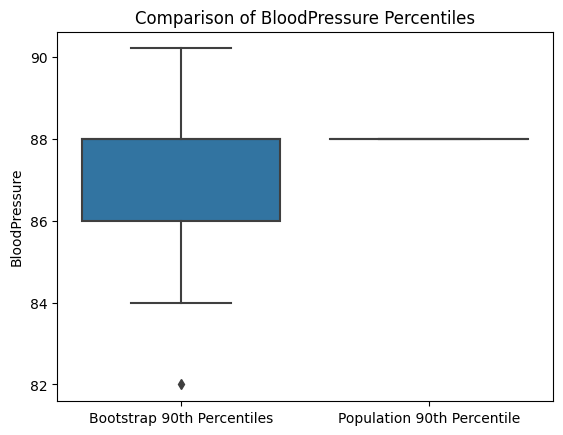

In [46]:
fig, ax = plt.subplots()
sns.boxplot(data=[bootstrap_percentiles, [population_bp_percentile]])
ax.set_xticklabels(['Bootstrap 90th Percentiles', 'Population 90th Percentile'])
ax.set_ylabel('BloodPressure')
ax.set_title('Comparison of BloodPressure Percentiles')
plt.show()